# Wine Quality: Exploratory Data Analysis 

# Config Notebook

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from scipy import stats 
import pingouin as pg

# import pyarrow as pa

In [321]:
# config packages
pd.options.mode.copy_on_write = "warn"

In [322]:
# load project config
with open("../config/config.yaml", "r") as file:
    config = yaml.safe_load(file)
config

{'data_path_wine_red': 'data/wine+quality/winequality-red.csv',
 'data_path_wine_white': 'data/wine+quality/winequality-white.csv'}

In [323]:
# useful constants
all_inputs = [
    'ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
    'chlorides', 
    'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
    'residual_sugar',
    'density',
    'alcohol'
    ]

all_columns = [
    'ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
    'chlorides', 
    'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
    'residual_sugar',
    'density',
    'alcohol',
    'quality'
]

# Import

In [324]:
# NOTE - Keep two data frames if data is actually separate
# TODO - how to build paths in python
# TODO - work with config

# wine data
# wine_r = pd.read_parquet('../' + config['data_path_wine_red'], sep=';')
# wine_w = pd.read_parquet('../' + config['data_path_wine_white'], sep=';')
wine_w = pd.read_parquet('../data/processed/wine_w.parquet')
wine_r = pd.read_parquet('../data/processed/wine_r.parquet')
wine   = pd.read_parquet('../data/processed/wine.parquet')

# normalized wine data
wine_w_norm = pd.read_parquet('../data/processed/wine_w_norm.parquet')
wine_r_norm = pd.read_parquet('../data/processed/wine_r_norm.parquet')
wine_norm = pd.read_parquet('../data/processed/wine_norm.parquet')

# outlier
wine_w_is_outlier_any = pd.read_parquet('../data/processed/wine_w_is_outlier_any.parquet')
wine_r_is_outlier_any = pd.read_parquet('../data/processed/wine_r_is_outlier_any.parquet')

In [325]:
wine_w.shape

(3017, 14)

In [326]:
wine_w_is_outlier_any.shape

(3746, 1)

In [327]:
remove_outliers = False

if remove_outliers:
    wine_w = wine_w[~wine_w_is_outlier_any.loc[:,0]]
    wine_r = wine_r[~wine_r_is_outlier_any.loc[:,0]]
    wine_w_norm = wine_w_norm[~wine_w_is_outlier_any.loc[:,0]]
    wine_r_norm = wine_r_norm[~wine_r_is_outlier_any.loc[:,0]]

In [328]:
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3017 entries, 1 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ph                    3017 non-null   float64 
 1   fixed_acidity         3017 non-null   float64 
 2   volatile_acidity      3017 non-null   float64 
 3   citric_acid           3017 non-null   float64 
 4   chlorides             3017 non-null   float64 
 5   total_sulfur_dioxide  3017 non-null   float64 
 6   free_sulfur_dioxide   3017 non-null   float64 
 7   sulphates             3017 non-null   float64 
 8   residual_sugar        3017 non-null   float64 
 9   density               3017 non-null   float64 
 10  alcohol               3017 non-null   float64 
 11  quality               3017 non-null   int64   
 12  color                 3017 non-null   category
 13  quality_label         3017 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 312.6 KB


In [329]:
wine_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ph                    1019 non-null   float64 
 1   fixed_acidity         1019 non-null   float64 
 2   volatile_acidity      1019 non-null   float64 
 3   citric_acid           1019 non-null   float64 
 4   chlorides             1019 non-null   float64 
 5   total_sulfur_dioxide  1019 non-null   float64 
 6   free_sulfur_dioxide   1019 non-null   float64 
 7   sulphates             1019 non-null   float64 
 8   residual_sugar        1019 non-null   float64 
 9   density               1019 non-null   float64 
 10  alcohol               1019 non-null   float64 
 11  quality               1019 non-null   int64   
 12  color                 1019 non-null   category
 13  quality_label         1019 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 105.7 KB


# Describe

In [330]:
wine_r.describe()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,3.322385,8.169872,0.522507,0.250805,0.078452,42.388616,14.959764,0.631237,2.198822,0.996547,10.385967,5.634936
std,0.132589,1.475073,0.167364,0.182313,0.014973,26.625802,8.838951,0.114861,0.452214,0.001616,0.992372,0.778011
min,2.940000,5.100000,0.120000,0.000000,0.039000,6.000000,1.000000,0.330000,1.200000,0.992350,8.700000,3.000000
25%,3.230000,7.100000,0.390000,0.080000,0.069000,22.000000,8.000000,0.550000,1.900000,0.995500,9.500000,5.000000
50%,3.320000,7.800000,0.520000,0.240000,0.078000,36.000000,13.000000,0.610000,2.100000,0.996560,10.100000,6.000000
75%,3.400000,9.000000,0.630000,0.400000,0.087000,56.000000,20.000000,0.700000,2.500000,0.997600,11.000000,6.000000
max,3.680000,12.300000,1.010000,0.730000,0.122000,124.000000,42.000000,0.980000,3.650000,1.001000,13.400000,8.000000


In [331]:
wine_w.describe()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,3.197799,6.790852,0.263484,0.323063,0.041636,130.757872,33.420948,0.480328,5.549917,0.993383,10.744348,5.956911
std,0.138515,0.757665,0.076552,0.082434,0.009970,36.720964,14.582780,0.099641,4.453633,0.002662,1.181445,0.864952
min,2.820000,4.800000,0.080000,0.110000,0.014000,24.000000,2.000000,0.220000,0.600000,0.987110,8.400000,3.000000
25%,3.100000,6.300000,0.210000,0.270000,0.035000,104.000000,23.000000,0.410000,1.600000,0.991330,9.800000,5.000000
50%,3.190000,6.800000,0.260000,0.310000,0.041000,128.000000,32.000000,0.470000,4.400000,0.993050,10.600000,6.000000
75%,3.290000,7.300000,0.310000,0.370000,0.048000,158.000000,43.000000,0.540000,8.200000,0.995300,11.600000,6.000000
max,3.570000,8.800000,0.485000,0.540000,0.072000,210.000000,76.000000,0.760000,18.400000,1.000800,14.200000,9.000000


### Primary Observations from describe
 - Acidity levels
   - The mean value of fixed, volatile acidity and pH seem to be higher in red wine.
   - Citric acidity is higher in white wines.
   - white wine is slightly lower in ph, i.e. more acidic, than red wine. 
 - chlorides are higher in red wines.
 - sulfur dioxide and sulphates
   - free and total sulfur dioxide is higher in white wines.
   - The mean value of sulphates seem to be higher in red wine compared to white wine.
 - residual sugar is higher in white wines, but it also varies quite strongly.
 - Density is similar.
 - alcohol content is similar in red and white wine.
 - quality rating is similar, there is one exceptional white wine.

In [332]:
wine_r.quality.value_counts().sort_index()

quality
3      3
4     33
5    434
6    423
7    115
8     11
Name: count, dtype: int64

In [333]:
wine_w.quality.value_counts().sort_index()

quality
3       8
4      82
5     781
6    1424
7     609
8     109
9       4
Name: count, dtype: int64

# Correlations

In [334]:
corr_w = wine_w.corr(numeric_only=True)
corr_w

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.381052,-0.070341,-0.094445,0.005062,0.037779,-0.014213,0.124823,-0.131970,-0.000009,0.024548,0.101078
fixed_acidity,-0.381052,1.000000,-0.030923,0.276947,0.095072,0.057488,-0.040336,-0.017005,0.035684,0.221287,-0.079701,-0.073457
volatile_acidity,-0.070341,-0.030923,1.000000,-0.141064,-0.023580,0.121630,-0.079520,-0.024718,0.099306,-0.014556,0.136099,-0.075699
citric_acid,-0.094445,0.276947,-0.141064,1.000000,0.014700,0.069050,0.060805,0.048491,0.001531,0.057606,0.010045,0.046493
chlorides,0.005062,0.095072,-0.023580,0.014700,1.000000,0.369641,0.156567,0.072797,0.242413,0.497052,-0.539009,-0.307270
total_sulfur_dioxide,0.037779,0.057488,0.121630,0.069050,0.369641,1.000000,0.606123,0.110688,0.382242,0.519831,-0.429843,-0.167537
free_sulfur_dioxide,-0.014213,-0.040336,-0.079520,0.060805,0.156567,0.606123,1.000000,0.023996,0.330026,0.301277,-0.219951,0.049885
sulphates,0.124823,-0.017005,-0.024718,0.048491,0.072797,0.110688,0.023996,1.000000,-0.059780,0.084367,-0.086600,0.022054
residual_sugar,-0.131970,0.035684,0.099306,0.001531,0.242413,0.382242,0.330026,-0.059780,1.000000,0.805067,-0.413879,-0.124754
density,-0.000009,0.221287,-0.014556,0.057606,0.497052,0.519831,0.301277,0.084367,0.805067,1.000000,-0.805102,-0.339166


In [335]:
corr_r = wine_r.corr(numeric_only=True)
corr_r

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.691921,0.250748,-0.483604,-0.185147,-0.007250,0.112894,0.004018,-0.076315,-0.236172,0.110793,-0.075161
fixed_acidity,-0.691921,1.000000,-0.286413,0.658949,0.203879,-0.089260,-0.142708,0.180186,0.240273,0.606904,-0.028774,0.113066
volatile_acidity,0.250748,-0.286413,1.000000,-0.623243,0.116740,0.103176,-0.019458,-0.308986,0.014063,0.042996,-0.223457,-0.352740
citric_acid,-0.483604,0.658949,-0.623243,1.000000,0.066564,0.006794,-0.068759,0.270542,0.159540,0.286796,0.154804,0.225350
chlorides,-0.185147,0.203879,0.116740,0.066564,1.000000,0.178468,0.027288,-0.074246,0.260378,0.424959,-0.294505,-0.184559
total_sulfur_dioxide,-0.007250,-0.089260,0.103176,0.006794,0.178468,1.000000,0.623135,-0.062753,0.180502,0.147937,-0.262084,-0.200703
free_sulfur_dioxide,0.112894,-0.142708,-0.019458,-0.068759,0.027288,0.623135,1.000000,0.084614,0.081973,-0.015487,-0.047003,-0.010566
sulphates,0.004018,0.180186,-0.308986,0.270542,-0.074246,-0.062753,0.084614,1.000000,0.057672,0.077635,0.281573,0.422770
residual_sugar,-0.076315,0.240273,0.014063,0.159540,0.260378,0.180502,0.081973,0.057672,1.000000,0.395120,0.091621,0.018182
density,-0.236172,0.606904,0.042996,0.286796,0.424959,0.147937,-0.015487,0.077635,0.395120,1.000000,-0.546861,-0.241069


In [336]:
# sns.pairplot(wine_r)

In [337]:
corr_w_plot.drop(columns='ph')

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol
fixed_acidity,1.000000,-0.030923,0.276947,0.095072,0.057488,-0.040336,-0.017005,0.035684,0.221287,-0.079701
volatile_acidity,-0.030923,1.000000,-0.141064,-0.023580,0.121630,-0.079520,-0.024718,0.099306,-0.014556,0.136099
citric_acid,0.276947,-0.141064,1.000000,0.014700,0.069050,0.060805,0.048491,0.001531,0.057606,0.010045
chlorides,0.095072,-0.023580,0.014700,1.000000,0.369641,0.156567,0.072797,0.242413,0.497052,-0.539009
total_sulfur_dioxide,0.057488,0.121630,0.069050,0.369641,1.000000,0.606123,0.110688,0.382242,0.519831,-0.429843
free_sulfur_dioxide,-0.040336,-0.079520,0.060805,0.156567,0.606123,1.000000,0.023996,0.330026,0.301277,-0.219951
sulphates,-0.017005,-0.024718,0.048491,0.072797,0.110688,0.023996,1.000000,-0.059780,0.084367,-0.086600
residual_sugar,0.035684,0.099306,0.001531,0.242413,0.382242,0.330026,-0.059780,1.000000,0.805067,-0.413879
density,0.221287,-0.014556,0.057606,0.497052,0.519831,0.301277,0.084367,0.805067,1.000000,-0.805102
alcohol,-0.079701,0.136099,0.010045,-0.539009,-0.429843,-0.219951,-0.086600,-0.413879,-0.805102,1.000000


### Plot Correlations

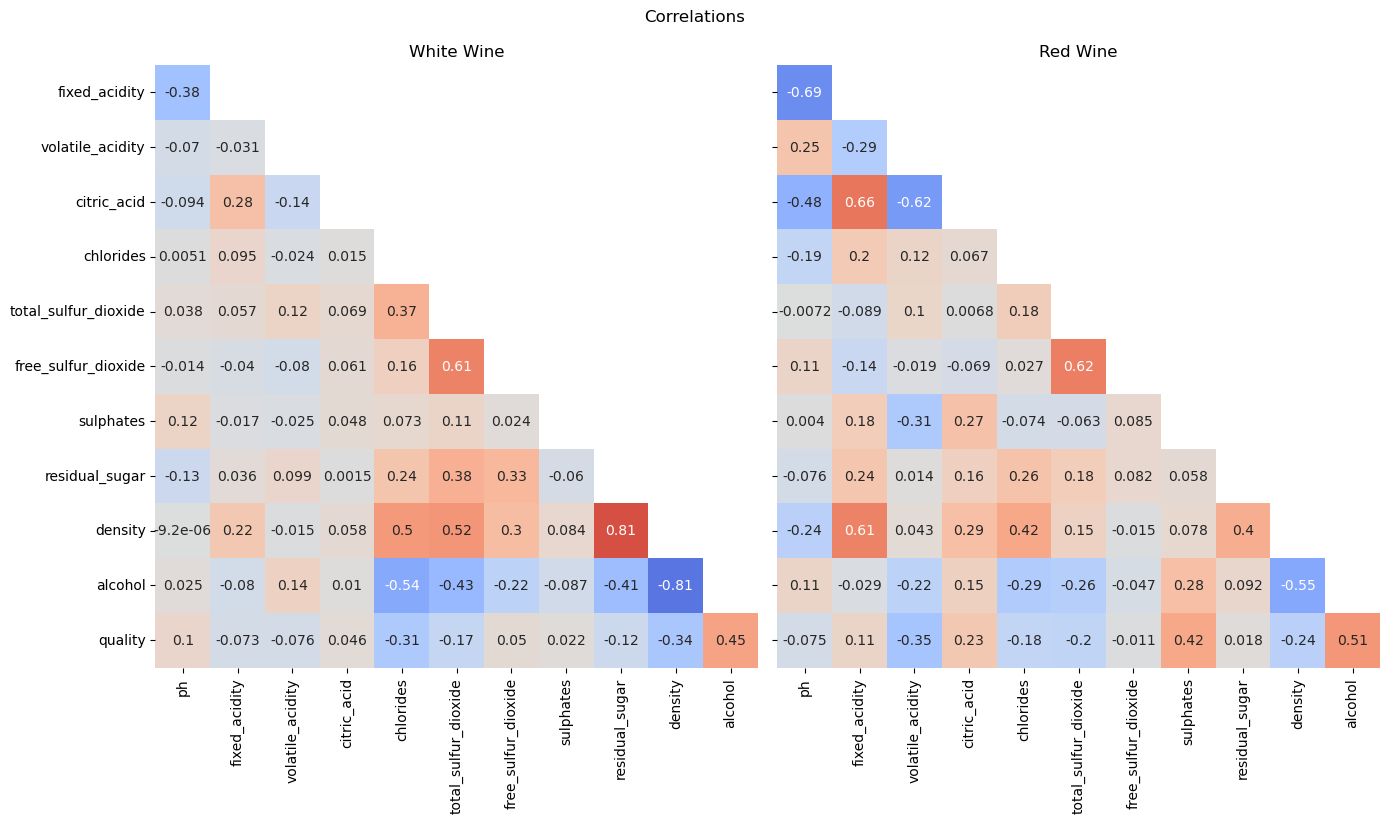

In [338]:
# plot correlation matrix for white wine
# TODO drop unnecessary columns
# TODO combine with red wine
f, ax = plt.subplots(1, 2, figsize=(14, 8), sharex=True, sharey=True)

plt.suptitle('Correlations')

corr_w_plot = corr_w.drop(index='ph', columns='quality')
corr_r_plot = corr_r.drop(index='ph', columns='quality')

mask = np.triu(np.ones_like(corr_w_plot, dtype=bool), k=1) # same for red wine

sns.heatmap(corr_w_plot, mask=mask, annot=True, cmap='coolwarm', cbar=False, vmin=-1, vmax=1, square=True, ax=ax[0])
sns.heatmap(corr_r_plot, mask=mask, annot=True, cmap='coolwarm', cbar=False, vmin=-1, vmax=1, square=True, ax=ax[1])

ax[0].set_title('White Wine')
ax[1].set_title('Red Wine')

plt.tight_layout()

C:\Users\olive\AppData\Local\Temp\ipykernel_32964\1364656078.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


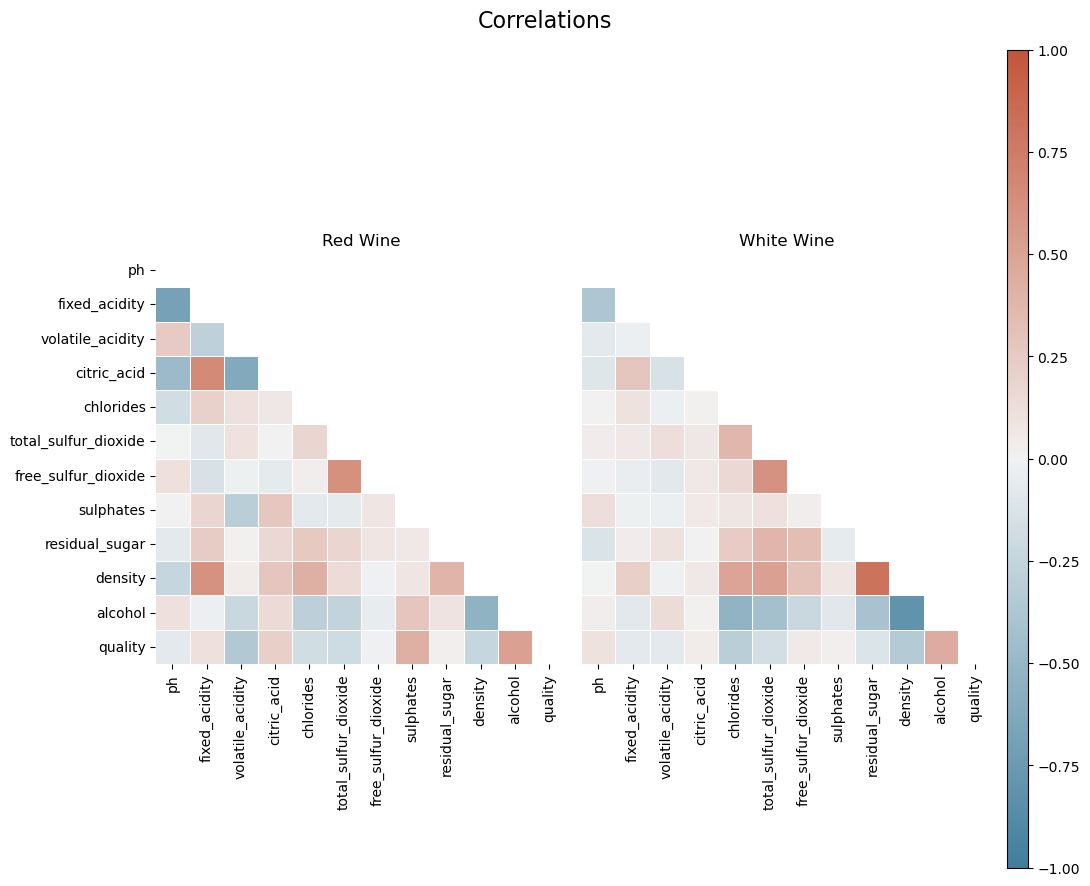

In [339]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_r, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3, figsize=(11, 9), gridspec_kw={"width_ratios":[1, 1, 0.05]})#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
cplot_wine_r = sns.heatmap(corr_r, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[0],
            cbar=False
            )

cplot_wine_w = sns.heatmap(corr_w, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[1],
            cbar=False
            )

# settings red wine plot
ax[0].set_title('Red Wine')

# settings white wine plot
ax[1].set_title('White Wine')
ax[1].set_yticks([], labels=[])
plt.legend().remove()

# colorbar
# TODO - reduce height of colorbar
mappable = cplot_wine_r.get_children()[0] # TODO - what's the artist? what does this mean?
plt.colorbar(mappable, cax=ax[2], orientation = 'vertical')#, pad=0.2)

# # legend
# # Get all lines and labels from all axes
# handles = []
# labels = []
# for ax in fig.axes:
#     for h, l in zip(*ax.get_legend_handles_labels()):
#         handles.append(h)
#         labels.append(l)

# # Remove any existing legends from subplots
# for ax in fig.axes:
#     if ax.get_legend():
#         ax.get_legend().remove()

# # Create figure-level legend
# # fig.legend(handles, labels, loc='upper center', 
# #            bbox_to_anchor=(0.5, 1.1), ncol=2)

# fig
fig.suptitle('Correlations', fontsize=16)

plt.tight_layout()

Correlations are considered
- high if absolute value > 0.4
- medium if 0.2 < absolute value < 0.4
- low if absolute value < 0.2

### Observations from corr for white wines
- The input parameter correlation are low, except for 
  - the quantities that are somewhat related, e.g. pH and acidity, whereas there are exceptions!
  - fixed acidity and density
  - sulfur oxides
    - residual sugar
    - density
  - density
    - alcohol 
    - fixed acidity (pos, medium)
    - density
  - alcohol
    - density (neg, high) causal!
    - total sulfur oxide (neg, high)
    - chlorides (neg, high)
    - free sulfur oxide (neg, high)
    - residual sugar (neg, medium) causal!
- Quality correlations are
  - high
    - alcohol (positive correlation)
    - density (negative correlation), surprisingly not for residual sugar
  - medium
    - volatile acidity: negative
    - chlorides: negative
  - low
    - fixed acidity: negative
    - pH: positive
    - total sulfur dioxide: negative
    - residual sugar: negative

### Observations from corr for red wines
- The input parameter correlation are pretty weak, except for 
  - fixed acidity and citric acid strong correlation
  - fixed acidity and density strong correlation
  - volatile acidity and sulphates
  - citric acid and pH
  - citric acid and sulphates
  - pH and chlorides
  - pH and density
  - pH and alcohol
  - chlorides and sulphates
  - chlorides and density
  - chlorides and alcohol
  - sulfur dioxides and residual sugar
    - total sulfur dioxide and alcohol
  - density and alcohol
- Quality correlations
  - strong
    - alcohol: positive
  - medium
    - volatile acidity; negative
    - citric acid; positive
    - total sulfur dioxide, but not free; negative 
    - sulphates; positive
    - density: negative
  - weak >0.1
    - chlorides 

### Differences red and white
- input parameters
  - fixed acidity and volatile acidity: strong in red, weak in white
  - volatile acidity and sulphates: strong in red, weak in white
  - volatile acidity and alcohol: strong, negative in red, weak, positive in white
  - 

Questions on data set
- density and residual sugar correlate differently with the other quantities. Why? what does that mean? 
- What do the correlations between the input quantities mean?
- What is the meaning of sulphates in red wine?
- sulphates seem to be beneficial in red wines. 

### Further Considerations on Quality Correlations

In [340]:
# TODO quality is a discrete variable; how to calculate the correlation coefficient? use point biserial
# stats.pointbiserialr(wine_r['quality'], wine_r['alcohol'])

### Correlation without Outliers

In [341]:
# TODO analyse dem shit

# Plot Configuration

In [342]:
# plot configs
# TODO - how to transfer the config efficiently to the figures? 

# first, try a dictionary
wine_type_colors = {
    'red_wine'  :'red',
    'white_wine':'gray'
    }

quality_label_colors = {
    'low'   :'o',
    'medium':'g',
    'high'  :'b'
    }

input_param_colors = {
    'fixed_acidity'         : 'darkorange',
    'volatile_acidity'      : 'burlywood',
    'citric_acid'           : 'antiquewhite',
    'ph'                    : 'chocolate',
    'chlorides'             : 'turquoise',
    'free_sulfur_dioxide'   : 'khaki',
    'total_sulfur_dioxide'  : 'gold',
    'sulphates'             : 'yellow',
    'residual_sugar'        : 'crimson',
    'density'               : 'cornflowerblue',
    'alcohol'               : 'blueviolet'
}

# TODO second, try a class! Could be easier

# define variables; problem: in the end I will have many many variables in the space that I do not understand anymore
color_red = 'red'
color_white = 'gray'

# Wine Type Counts

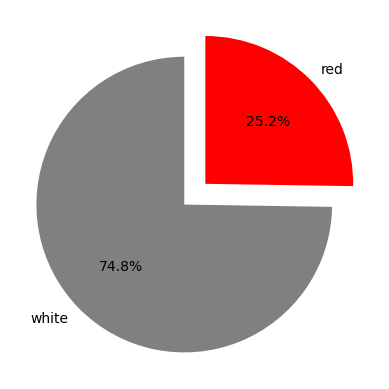

In [343]:
wine_types_count = wine.color.value_counts()

fig, ax = plt.subplots()
ax.pie(
    wine_types_count.values, labels=wine_types_count.index, 
    colors=[wine_type_colors['white_wine'], wine_type_colors['red_wine']],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0.1)#, 0, 1), (0.1, 0.1, 0, 1)]
    );

# Wine Quality

## Quality distribution

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval
c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval


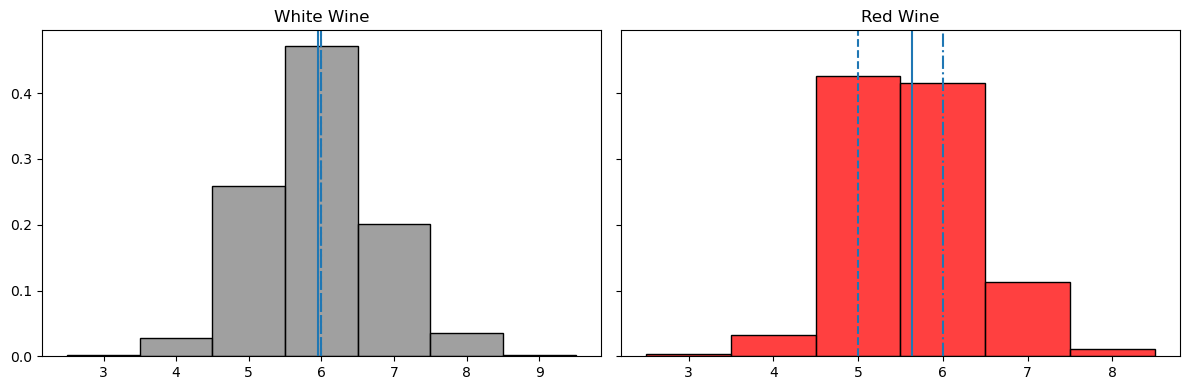

In [344]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# NOTE draw bars in the middle of the value without gaps -> discrete=True
# NOTE kde does not make sense here, does it?
sns.histplot(wine_w.quality, ax=ax[0], color=color_white, discrete=True, stat='density') #, kde=True)
sns.histplot(wine_r.quality, ax=ax[1], color=color_red, discrete=True, stat='density') #, kde=True)

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

# show average, median and mode
ylim = ax[0].get_ylim() # TODO find a way to skip this workaround
ax[0].vlines(
    [wine_w.quality.mean(), wine_w.quality.median(), wine_w.quality.mode()],
    ymin=ax[0].get_ylim()[0],
    ymax=ax[0].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[0].set_ylim(ylim)

ylim=ax[1].get_ylim()
ax[1].vlines(
    [wine_r.quality.mean(), wine_r.quality.median(), wine_r.quality.mode()],
    ymin=ax[1].get_ylim()[0],
    ymax=ax[1].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[1].set_ylim(ylim)

plt.tight_layout()

In [345]:
wine_w_top10 = wine_w.drop_duplicates(all_inputs).sort_values('quality', ascending=False).head(10)
wine_w_top10

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label
1605,3.37,7.1,0.26,0.49,0.032,113.0,31.0,0.42,2.2,0.99030,12.9,9,white,high
876,3.28,6.9,0.36,0.34,0.018,119.0,57.0,0.36,4.2,0.98980,12.7,9,white,high
820,3.41,6.6,0.36,0.29,0.021,85.0,24.0,0.61,1.6,0.98965,12.4,9,white,high
827,3.28,7.4,0.24,0.36,0.031,139.0,27.0,0.48,2.0,0.99055,12.5,9,white,high
1333,3.09,7.8,0.21,0.39,0.034,180.0,62.0,0.75,1.8,0.99100,12.6,8,white,high
3473,3.20,6.5,0.30,0.27,0.038,97.0,37.0,0.60,4.0,0.99026,12.6,8,white,high
3476,3.04,6.2,0.37,0.24,0.032,86.0,19.0,0.26,6.1,0.98934,13.4,8,white,high
3489,3.04,6.7,0.28,0.31,0.041,81.0,7.0,0.47,7.4,0.99254,11.4,8,white,high
3468,3.23,6.6,0.16,0.36,0.031,93.0,27.0,0.34,1.1,0.98884,13.2,8,white,high
1344,3.26,7.3,0.23,0.37,0.041,165.0,51.0,0.40,1.9,0.99080,12.2,8,white,high


In [346]:
wine_w_norm_top10 = wine_w_norm.drop_duplicates(all_inputs).sort_values('quality', ascending=False).head(16)
wine_w_norm_top10

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,quality_label
1605,0.733333,0.575,0.444444,0.883721,0.310345,0.478495,0.391892,0.370370,0.089888,0.233017,0.775862,9,high
876,0.613333,0.525,0.691358,0.534884,0.068966,0.510753,0.743243,0.259259,0.202247,0.196494,0.741379,9,high
820,0.786667,0.450,0.691358,0.418605,0.120690,0.327957,0.297297,0.722222,0.056180,0.185537,0.689655,9,high
827,0.613333,0.650,0.395062,0.581395,0.293103,0.618280,0.337838,0.481481,0.078652,0.251278,0.706897,9,high
1333,0.360000,0.750,0.320988,0.651163,0.344828,0.838710,0.810811,0.981481,0.067416,0.284149,0.724138,8,high
3473,0.506667,0.425,0.543210,0.372093,0.413793,0.392473,0.472973,0.703704,0.191011,0.230095,0.724138,8,high
3476,0.293333,0.350,0.716049,0.302326,0.310345,0.333333,0.229730,0.074074,0.308989,0.162893,0.862069,8,high
3489,0.293333,0.475,0.493827,0.465116,0.465517,0.306452,0.067568,0.462963,0.382022,0.396640,0.517241,8,high
3468,0.546667,0.450,0.197531,0.581395,0.293103,0.370968,0.337838,0.222222,0.028090,0.126370,0.827586,8,high
1344,0.586667,0.625,0.370370,0.604651,0.465517,0.758065,0.662162,0.333333,0.073034,0.269540,0.655172,8,high


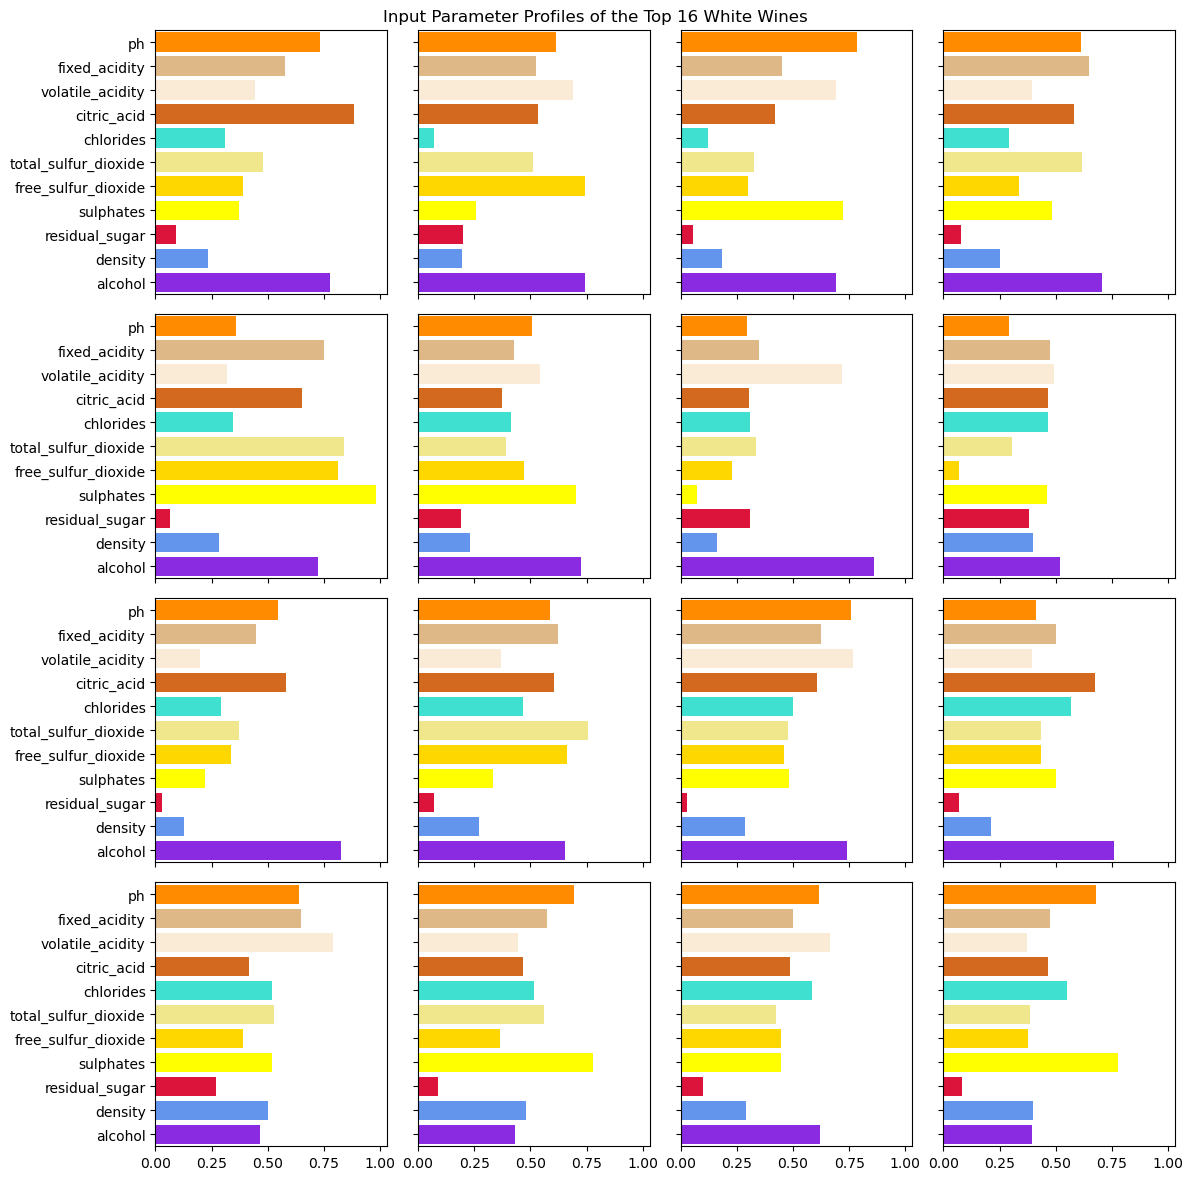

In [347]:
# plot physiochemical profile of the top wines
fig,ax = plt.subplots(4,4, figsize=(12,12), sharex=True, sharey=True)
ax = ax.flatten()

plt.suptitle('Input Parameter Profiles of the Top 16 White Wines')

for w, a in zip(wine_w_norm_top10[all_inputs].values, ax):
   #  print(w)
   sns.barplot(y=all_inputs, x=w, ax=a, orient='h')
   #  sns.barplot(x=all_inputs, y=w, ax=a, orient='v')
   #  a.tick_params(axis='x', labelrotation=90)

   for bars in a.containers:
      for bar, color in zip(bars, input_param_colors.values()):
         bar.set_facecolor(color)

# take away the spines
# sns.despine()

plt.tight_layout()

#### White Wine Quality Distribution
  - avg: 5.8. avg=median, mode: 6
  - slighty negatively skewed, almost symmetric distribution
  - conclusion
    - Kind of normally distributed data set
    - sample: average wine years, wines meet the expectations, maybe slightly more bad wines
    - tasters: testing might not be symmetric
    - good representation of sample and testers

#### Red Wine Quality Distribution
  - avg: 5.6, median: 6, mode: 5
  - more shifted to lower ratings
  - skew unclear: positively skewed?
  - conclusions
    - Kind of normally distributed data set
    - sample: wine could be from relatively bad years
    - tasters: testing might not be symmetric
    - good representation of sample and testers

## Quality Label distribution

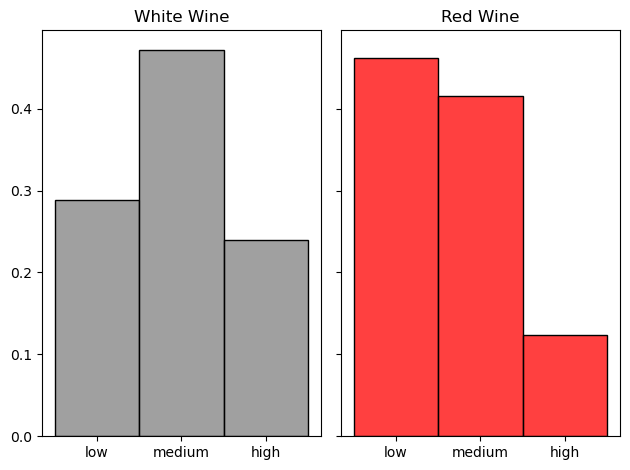

In [348]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

sns.histplot(wine_w.quality_label, ax=ax[0], color=color_white, stat="density") # NOTE stat = density for normalization
sns.histplot(wine_r.quality_label, ax=ax[1], color=color_red, stat="density")

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

In [349]:
wine_r.quality_label.value_counts()

quality_label
low       470
medium    423
high      126
Name: count, dtype: int64

In [350]:
wine_w.quality_label.value_counts()

quality_label
medium    1424
low        871
high       722
Name: count, dtype: int64

Questions: 
- move the quality label?
- create a new quality label based on the high quality wines? 

Follow-Up Tasks
- Investigate high quality wines for similarities in chemical composition. Is there a composition that convinced the testers the most?
-  

## Alcohol vs. Wine Quality

### Quality Rating

<Axes: xlabel='quality', ylabel='alcohol'>

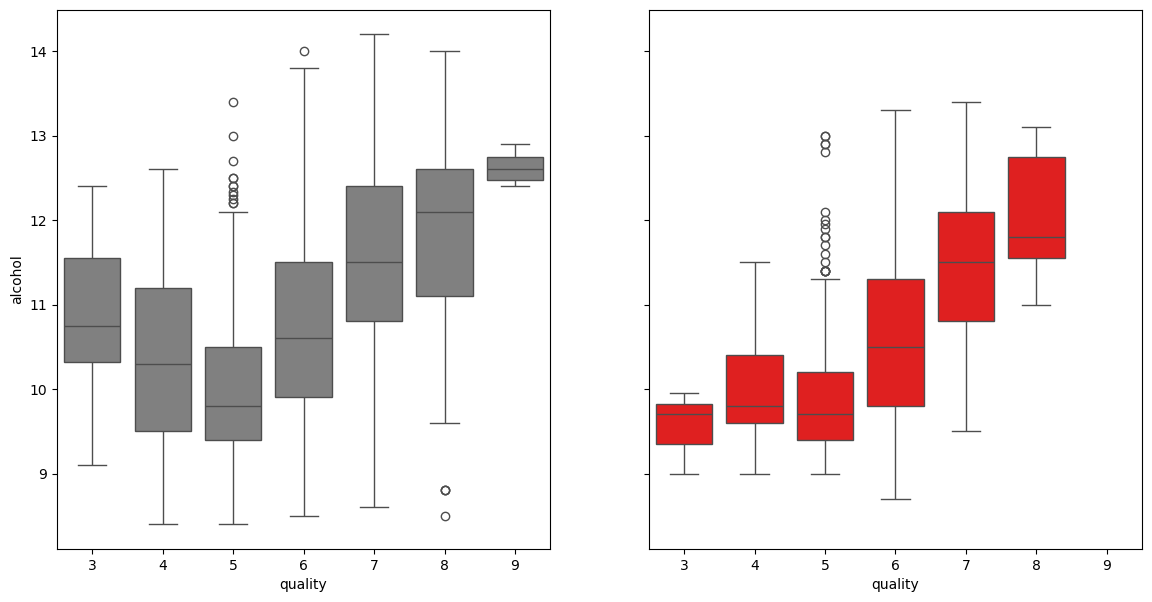

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,7), sharex=True, sharey=True)

sns.boxplot(wine_w, y='alcohol', x='quality', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, y='alcohol', x='quality', color=wine_type_colors['red_wine'  ], ax=ax[1])

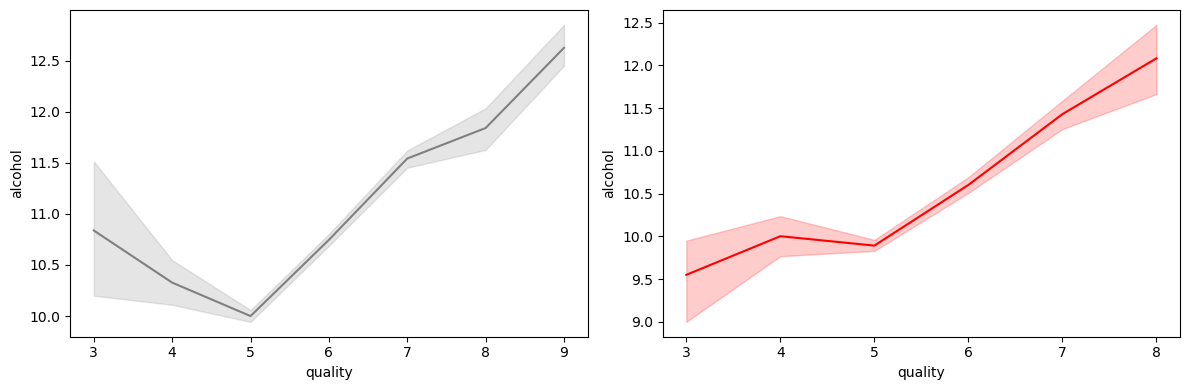

In [396]:
# TODO plot the averages and std
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(wine_w, x='quality', y='alcohol', color=wine_type_colors['white_wine'], ax=ax[0])
sns.lineplot(wine_r, x='quality', y='alcohol', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

- Alcohol content is an indicator of good wine, however it's not decisive, because low quality wines also have a high alcohol content
- Alcohol, Alcohol and Residual Sugar are indicators of the fermentation process.
- Usually 50% of the input sugar can be turned into alcohol before fermentation stops.

#### Questions
- Is there a reason for this distribution?

#### Tasks
- Investigate the increase from rating of 5; cut out the bad wines, to find out a what's a good wine.

### Quality Labels

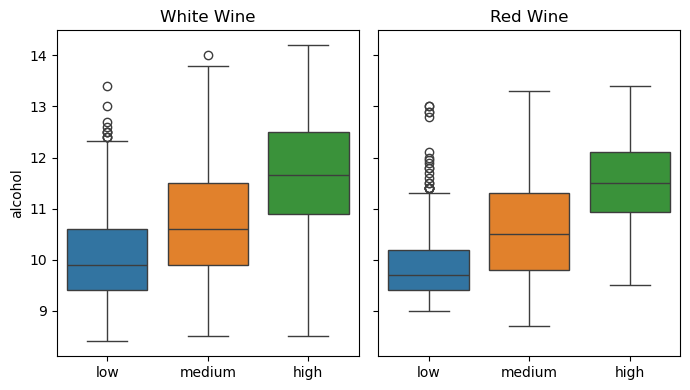

In [353]:
fig, ax = plt.subplots(1, 2, figsize=(7,4), sharex=True, sharey=True)
ax = ax.flatten()

# sns.boxplot(wine_r, x='quality', y='alcohol', ax=ax[0])
# sns.boxplot(wine_w, x='quality', y='alcohol', ax=ax[1])
sns.boxplot(wine_w, x='quality_label', y='alcohol', hue='quality_label', ax=ax[0])
sns.boxplot(wine_r, x='quality_label', y='alcohol', hue='quality_label', ax=ax[1])

ax[0].set_title('White Wine')
ax[0].set_xlabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

### Hypothesis Testing with Kruskal-Wallis, Welch ANOVA, ANOVA 

In [354]:
# test if ANOVA assumptions are met
print(pg.normality(wine_w, dv='alcohol', group='quality_label'))
print()
print(wine_w.groupby('quality_label').alcohol.var())

                      W          pval  normal
quality_label                                
medium         0.978738  1.161827e-13   False
low            0.953413  5.545711e-16   False
high           0.978878  1.059183e-08   False

quality_label
low       0.779379
medium    1.200654
high      1.205928
Name: alcohol, dtype: float64


C:\Users\olive\AppData\Local\Temp\ipykernel_32964\204133251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(wine_w.groupby('quality_label').alcohol.var())


In [355]:
# use Welch ANOVA
pg.welch_anova(wine_w, dv='alcohol', between='quality_label')

,Source,ddof1,ddof2,F,p-unc,np2
0,quality_label,2,1715.830551,480.294821,2.258412e-166,0.226546


In [356]:
f,p = stats.kruskal(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f,p)

672.8835039261245 7.677213893540514e-147


In [357]:
# for comparison: ANOVA TEST on quality label and alcohol content
f,p = stats.f_oneway(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f, p)

441.4033551621894 7.423624899372275e-169


### Conclusions on quality distribution

- High quality wines tend to have a higher alcohol content.
- The range is however very large.
- Although there is a strong, positive correlation between quality alcohol, the outliers show that this is not a conclusive measure for quality.
- Medium quality wines have a low alcohol content, but there are many outliers with a very high alcohol content in this group.

Questions
- What are the features of medium quality wines?
- How do wines get a high alcohol content?
  - yeast turns sugar into alcohol and ??? 
  - residual sugar -> sweetness
  - What about density?
  - acidity

## Density vs. Wine Quality 

<Axes: xlabel='quality', ylabel='density'>

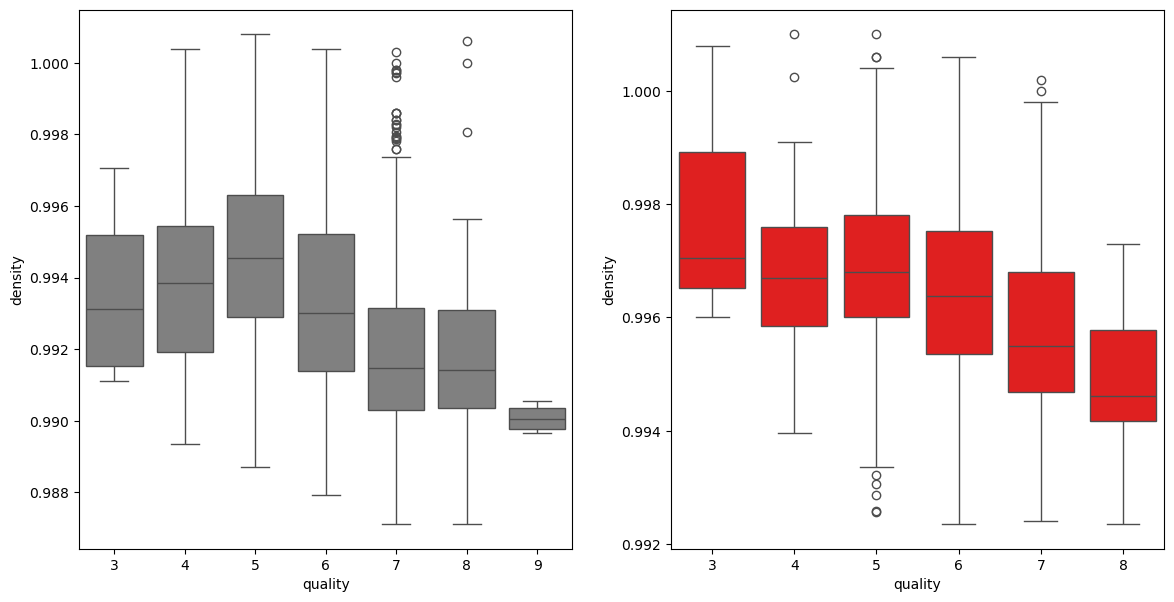

In [397]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='density', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='density', color=wine_type_colors['red_wine'], ax=ax[1])

# new_ylim = [ax[1].get_ylim()[0], ax[0].get_ylim()[1]]
# ax[0].set_ylim(new_ylim)
# ax[1].set_ylim(new_ylim)

In [359]:
wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label
1680,3.22,7.6,0.32,0.34,0.054,197.0,44.0,0.55,18.35,1.00080,9.0,5,white,low
779,3.28,8.1,0.17,0.44,0.053,145.0,43.0,0.75,14.10,1.00060,8.8,8,white,high
1078,3.49,6.5,0.26,0.34,0.051,197.0,56.0,0.42,16.30,1.00040,9.8,5,white,low
1664,3.27,8.1,0.28,0.46,0.059,177.0,32.0,0.58,15.40,1.00040,9.0,4,white,low
4014,2.98,6.5,0.18,0.48,0.054,183.0,56.0,0.61,18.00,1.00038,8.5,6,white,medium


Question:
- What is wine density? 

## Residual Sugar vs. Wine Quality 

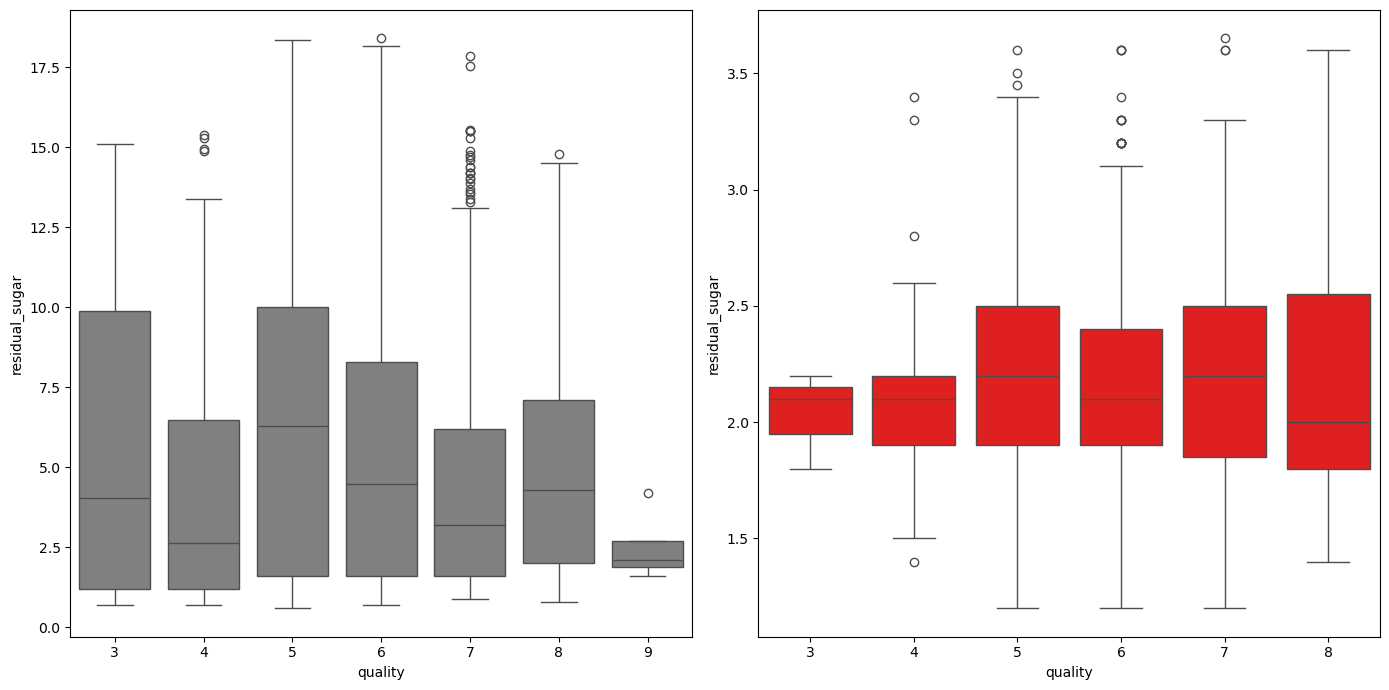

In [398]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, y='residual_sugar', x='quality', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, y='residual_sugar', x='quality', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

## Sulphates vs. Wine Quality

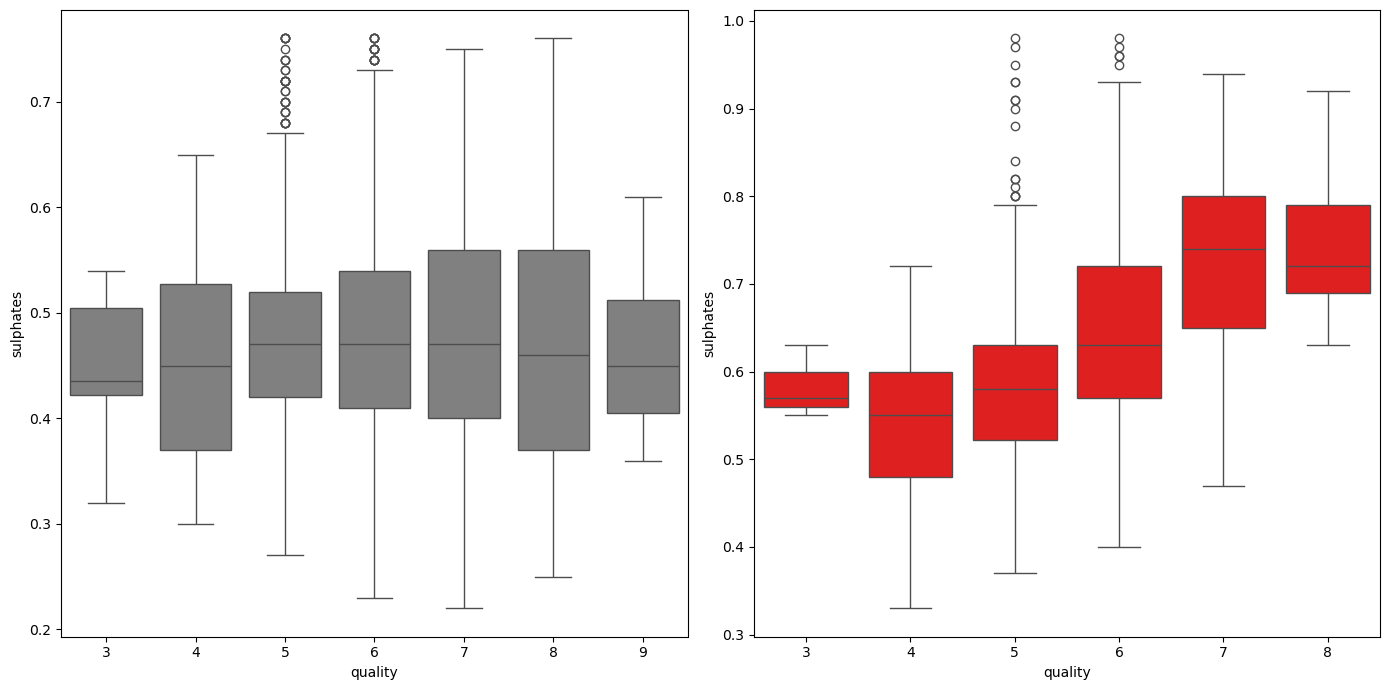

In [399]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='sulphates', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='sulphates', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

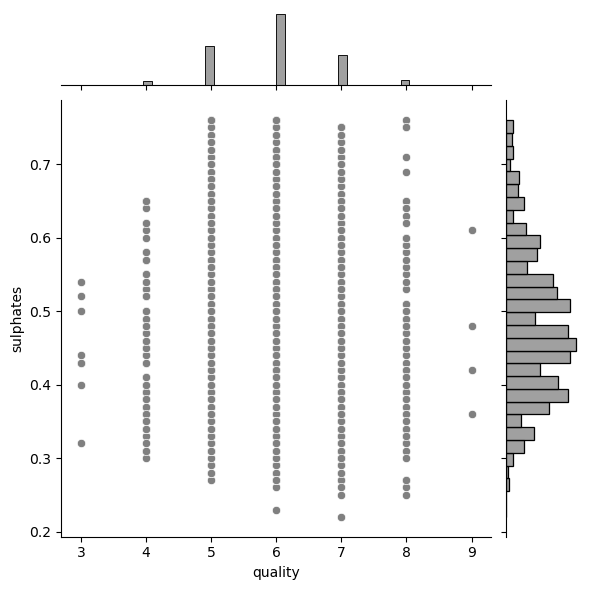

In [362]:
# fig, ax = plt.subplots(1, 2)

jg = sns.jointplot(data=wine_w, x="quality", y="sulphates", color=wine_type_colors['white_wine'])

# plt.tight_layout()

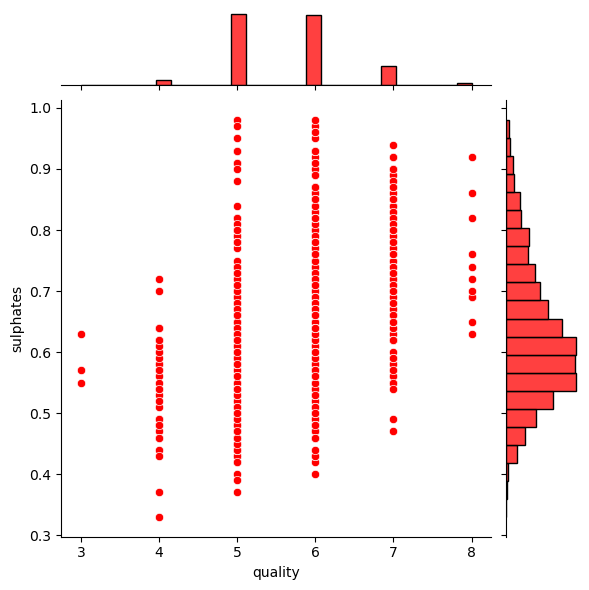

In [363]:
sns.jointplot(data=wine_r, x="quality", y="sulphates", color=wine_type_colors['red_wine'])

## Fixed Acidity vs. Wine Quality

<Axes: xlabel='quality', ylabel='fixed_acidity'>

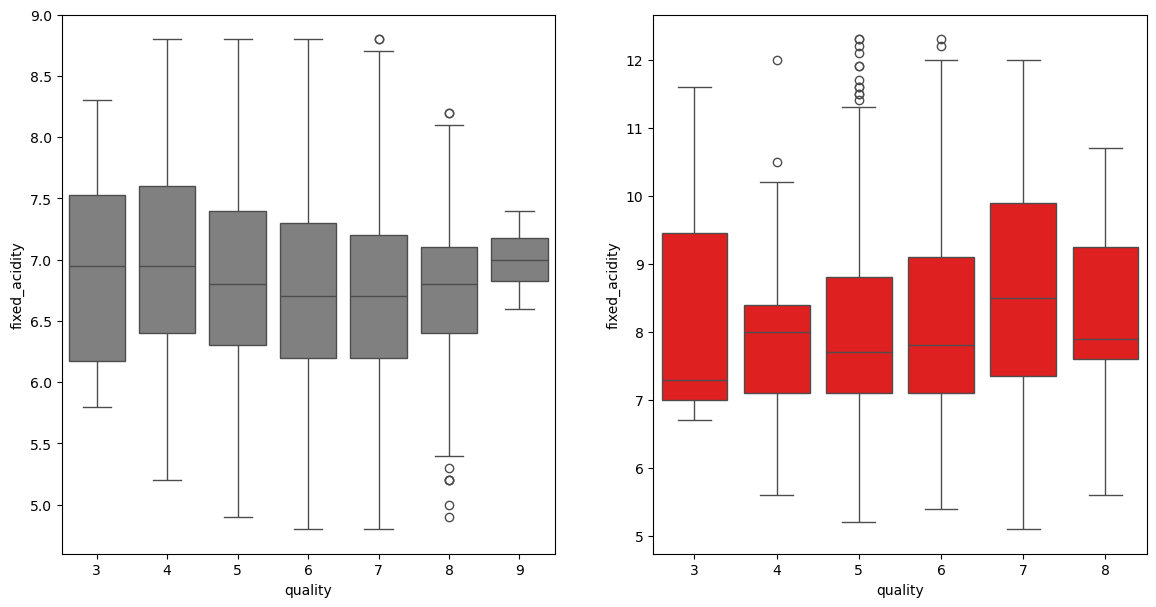

In [400]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='fixed_acidity', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='fixed_acidity', color=wine_type_colors['red_wine'], ax=ax[1])

## Volatile Acidity vs. Wine Quality

<Axes: xlabel='quality', ylabel='volatile_acidity'>

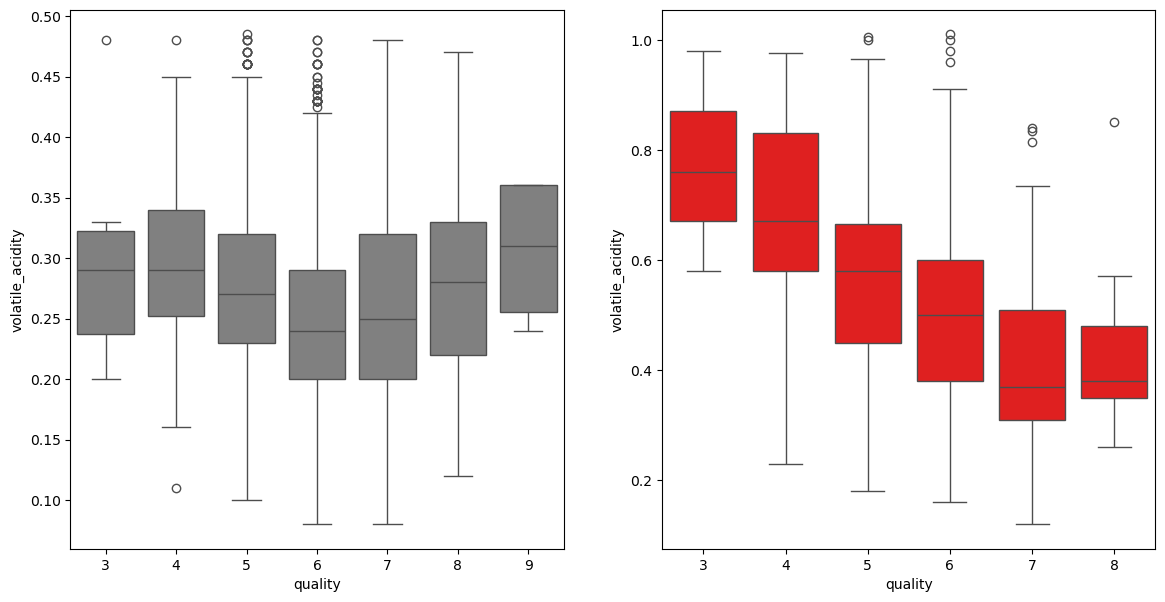

In [401]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='volatile_acidity', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='volatile_acidity', color=wine_type_colors['red_wine'], ax=ax[1])

<Axes: xlabel='quality', ylabel='volatile_acidity'>

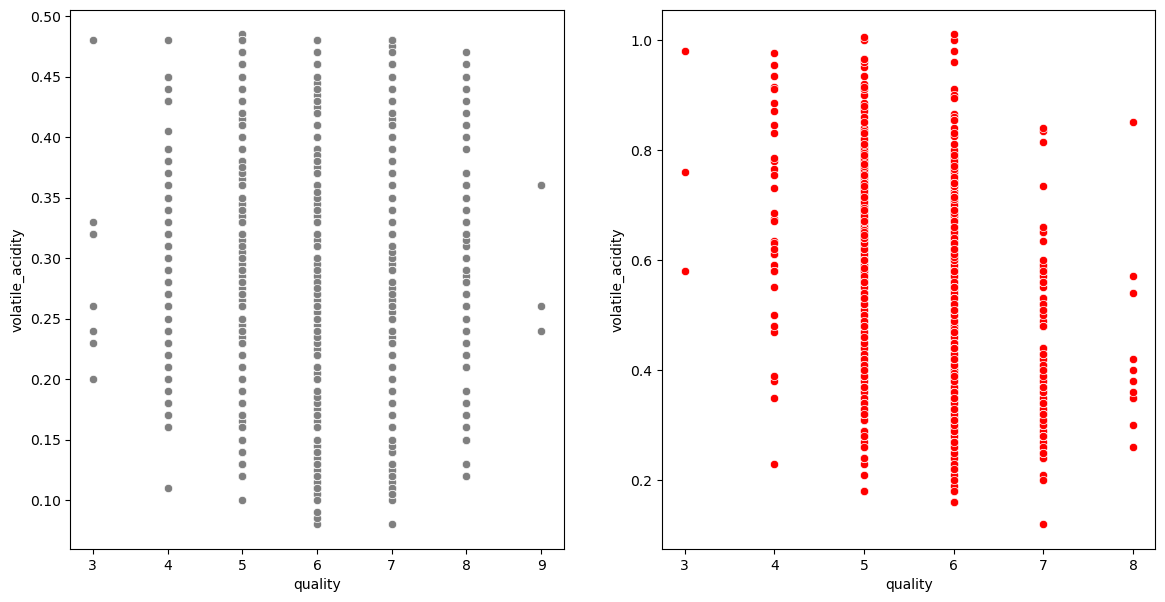

In [402]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.scatterplot(wine_w, x='quality', y='volatile_acidity', color=wine_type_colors['white_wine'], ax=ax[0])
sns.scatterplot(wine_r, x='quality', y='volatile_acidity', color=wine_type_colors['red_wine'], ax=ax[1])

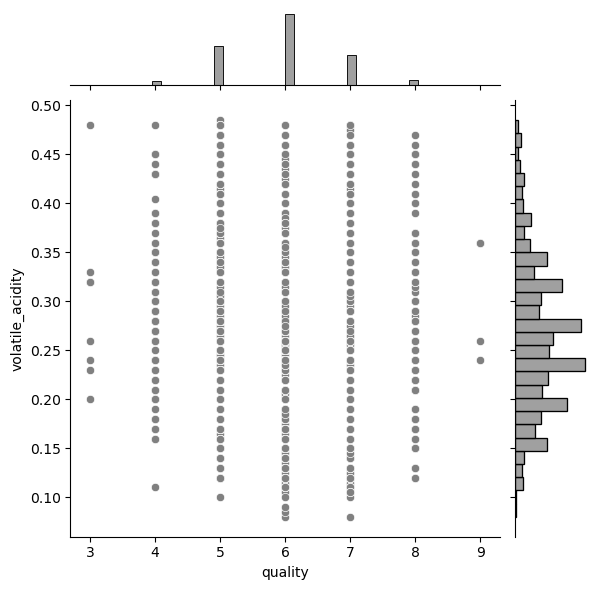

In [367]:
sns.jointplot(data=wine_w, x="quality", y="volatile_acidity", color=wine_type_colors['white_wine'])

## Chlorides vs Wine Quality

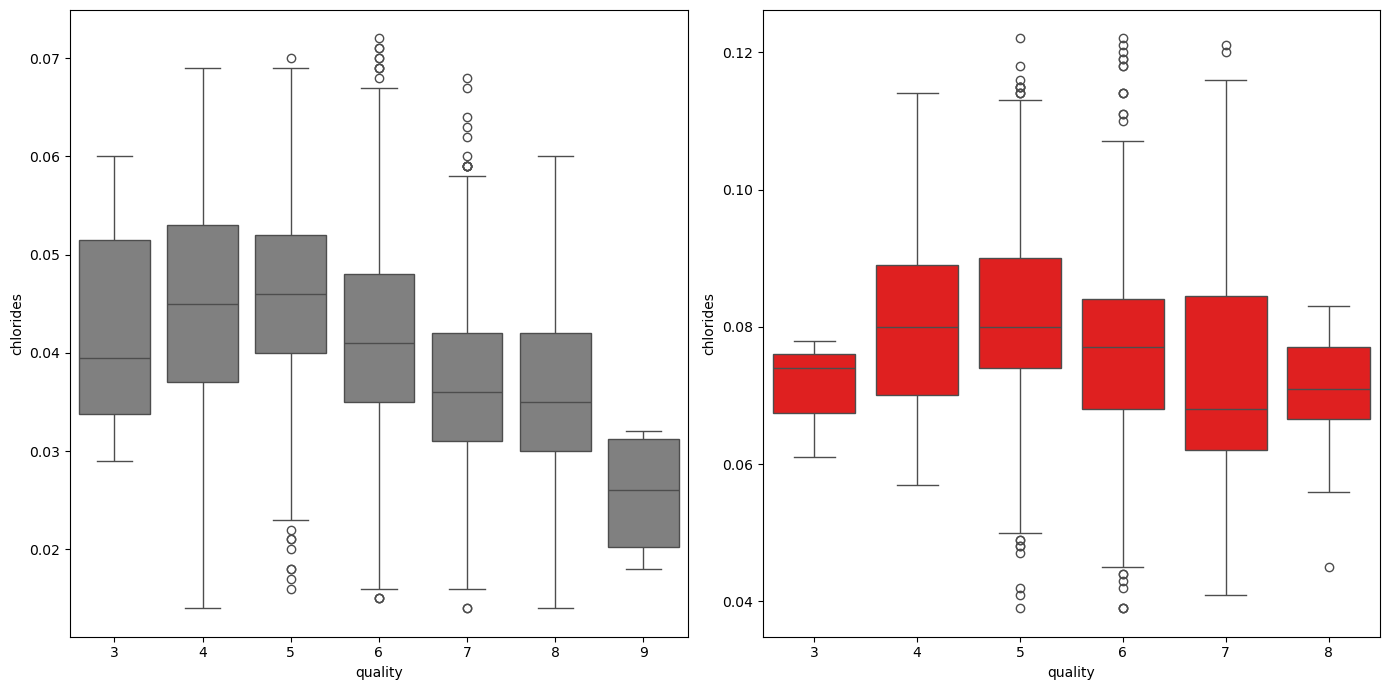

In [403]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='chlorides', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='chlorides', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

## pH vs Wine Quality

<Axes: xlabel='quality', ylabel='ph'>

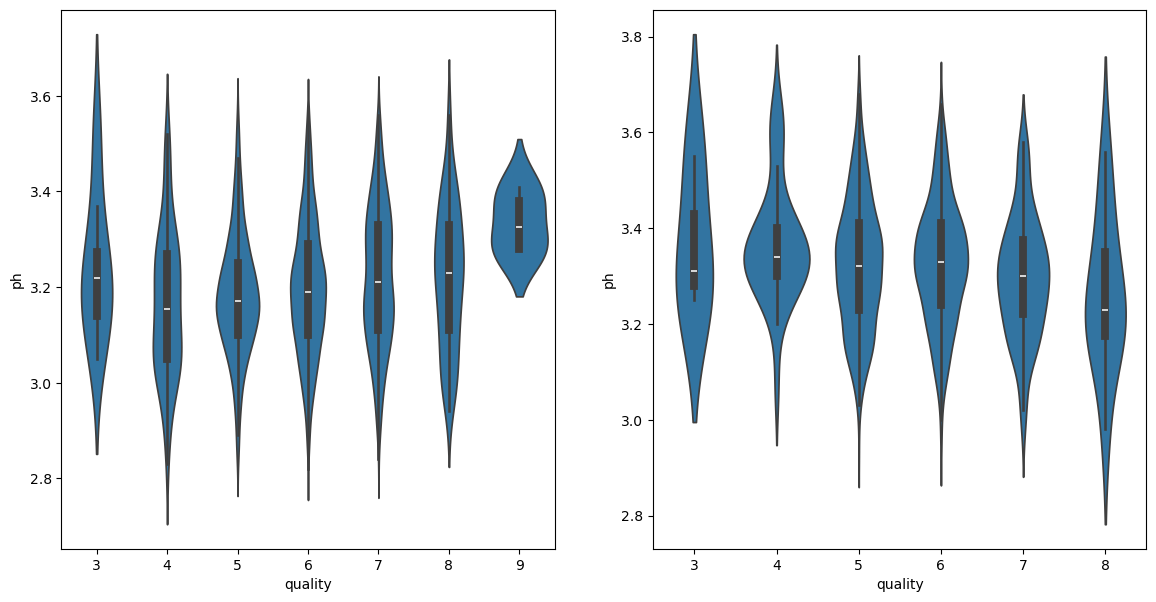

In [369]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.violinplot(wine_w, x='quality', y='ph', ax=ax[0])
sns.violinplot(wine_r, x='quality', y='ph', ax=ax[1])

### pH vs residual sugar vs wine quality

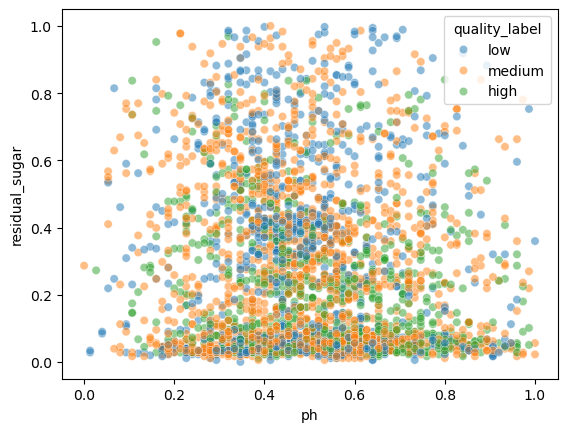

In [370]:
ax = sns.scatterplot(
    wine_w_norm,
    y='residual_sugar',
    x='ph',
    hue='quality_label',
    alpha=0.5
)

# ax.set_ylim([0, 40])

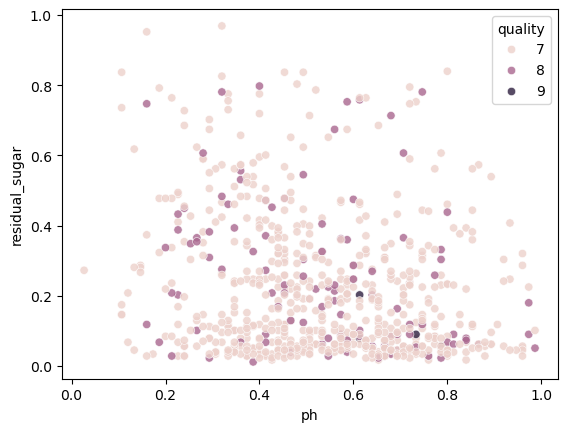

In [371]:
ax = sns.scatterplot(
    wine_w_norm[wine_w_norm.quality>6],
    y='residual_sugar',
    x='ph',
    hue='quality',
    alpha=0.8
)

# ax.set_ylim([0, 40])

## High Quality Wines

In [372]:
wine_w_hq = wine_w[wine_w.quality_label == 'high']

In [373]:
# TODO What does this mean? Does this make sense? 

corr_wine_w_hq = wine_w_hq.corr(numeric_only=True)
corr_wine_w_hq

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.428947,-0.027903,-0.087769,0.034405,0.096511,0.039954,0.141586,-0.223729,0.002359,-0.063924,0.023429
fixed_acidity,-0.428947,1.000000,-0.020797,0.254678,0.131164,0.139644,0.015182,0.000930,0.165525,0.382460,-0.200706,0.012629
volatile_acidity,-0.027903,-0.020797,1.000000,-0.165209,-0.229285,-0.007905,-0.123443,-0.102169,0.065938,-0.220331,0.444764,0.073689
citric_acid,-0.087769,0.254678,-0.165209,1.000000,0.067340,0.127929,0.081284,0.003563,0.065838,0.152915,-0.080487,0.058795
chlorides,0.034405,0.131164,-0.229285,0.067340,1.000000,0.274724,0.125313,0.126626,0.138774,0.434501,-0.485741,-0.067684
total_sulfur_dioxide,0.096511,0.139644,-0.007905,0.127929,0.274724,1.000000,0.548158,-0.003591,0.307276,0.445474,-0.311144,0.007445
free_sulfur_dioxide,0.039954,0.015182,-0.123443,0.081284,0.125313,0.548158,1.000000,0.085803,0.120474,0.152835,-0.125295,0.064920
sulphates,0.141586,0.000930,-0.102169,0.003563,0.126626,-0.003591,0.085803,1.000000,-0.109307,0.107517,-0.159784,-0.069050
residual_sugar,-0.223729,0.165525,0.065938,0.065838,0.138774,0.307276,0.120474,-0.109307,1.000000,0.743294,-0.315123,0.046334
density,0.002359,0.382460,-0.220331,0.152915,0.434501,0.445474,0.152835,0.107517,0.743294,1.000000,-0.796925,-0.037834


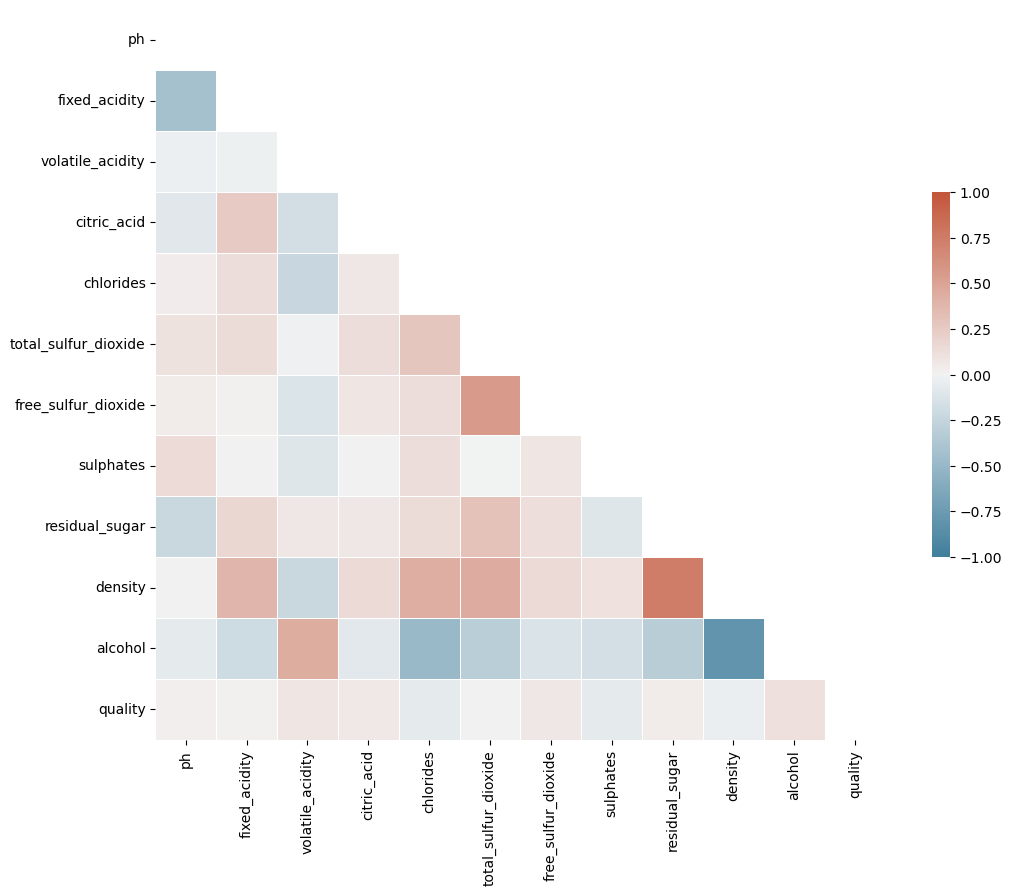

In [374]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_wine_w_hq, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

cplot_wine_w = sns.heatmap(corr_wine_w_hq, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            cbar=True
            )

plt.tight_layout()

Very low quality correlations! So, from the inputs one cannot really say if a wine is high quality. 

# Inputs

## Fixed Acidity

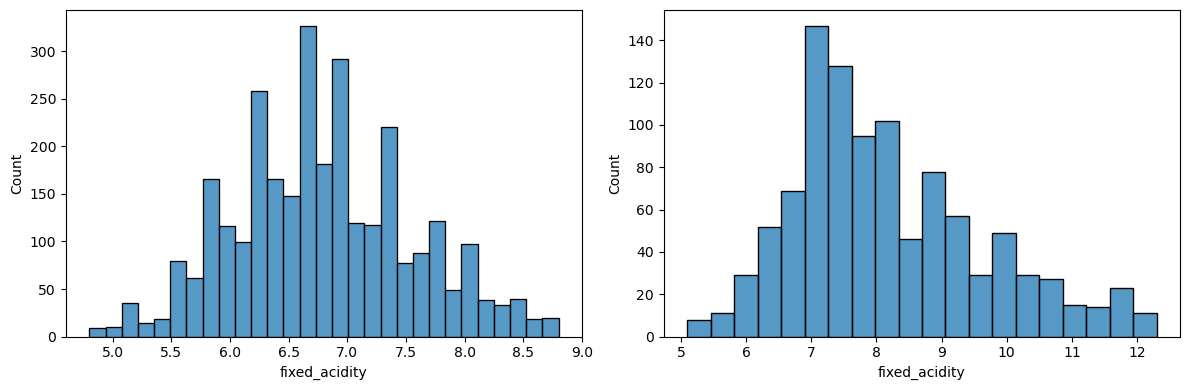

In [375]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='fixed_acidity', ax=ax[0])
sns.histplot(wine_r, x='fixed_acidity', ax=ax[1])

plt.tight_layout()

## Volatile Acidity

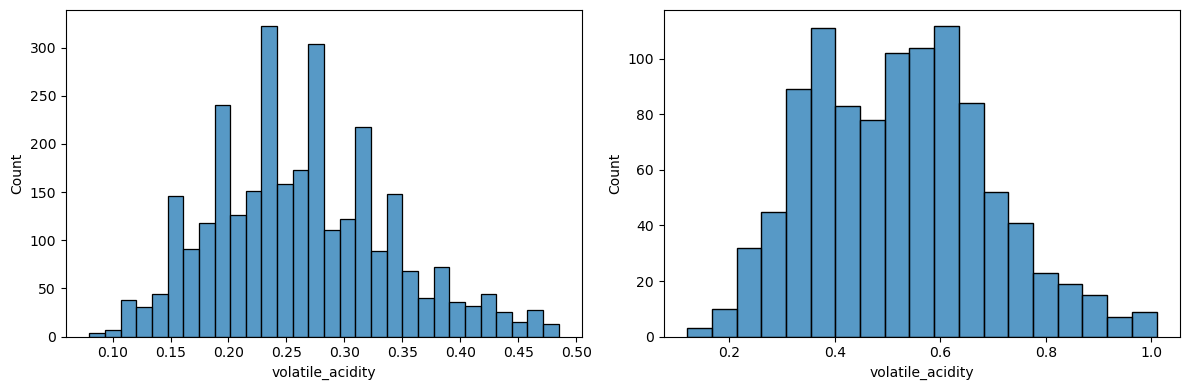

In [376]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='volatile_acidity', ax=ax[0])
sns.histplot(wine_r, x='volatile_acidity', ax=ax[1])

plt.tight_layout()

## Citric Acid

<Axes: xlabel='citric_acid', ylabel='Count'>

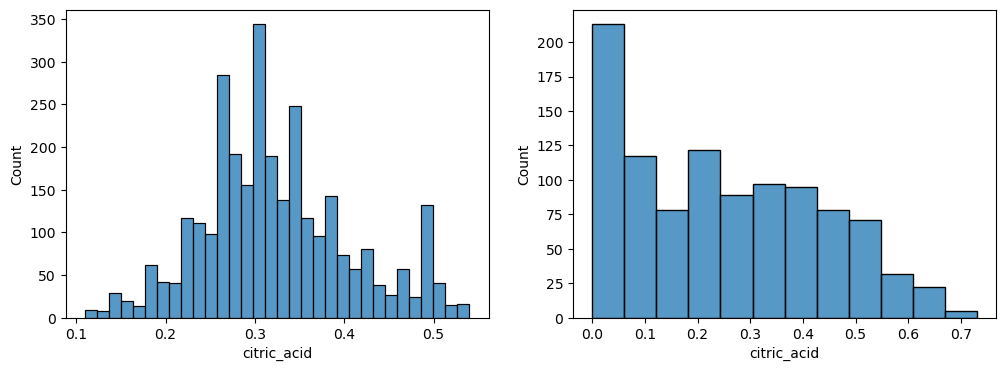

In [377]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='citric_acid', ax=ax[0])
sns.histplot(wine_r, x='citric_acid', ax=ax[1])

In [378]:
pg.normality(wine_w.citric_acid)

,W,pval,normal
citric_acid,0.97698,1.074380e-21,False


## pH

<Axes: xlabel='ph', ylabel='Count'>

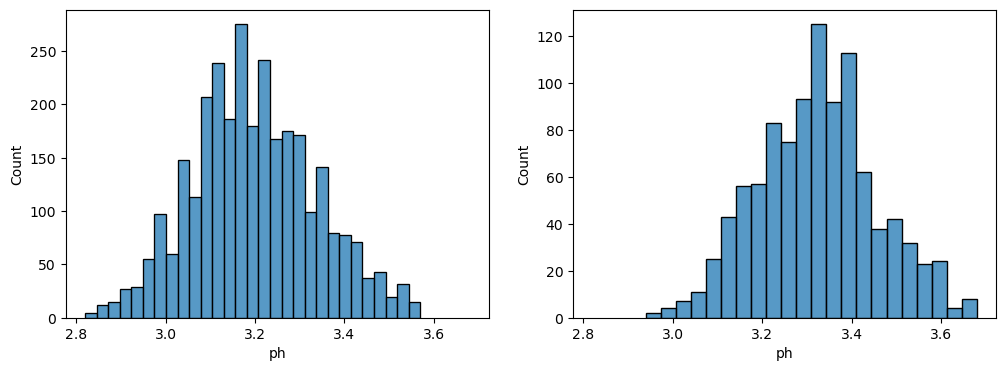

In [379]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)

sns.histplot(wine_w, x='ph', ax=ax[0])
sns.histplot(wine_r, x='ph', ax=ax[1])

In [380]:
print(pg.normality(wine_w.ph))

           W          pval  normal
ph  0.994787  7.393451e-09   False


## Chlorides

<Axes: xlabel='chlorides', ylabel='Count'>

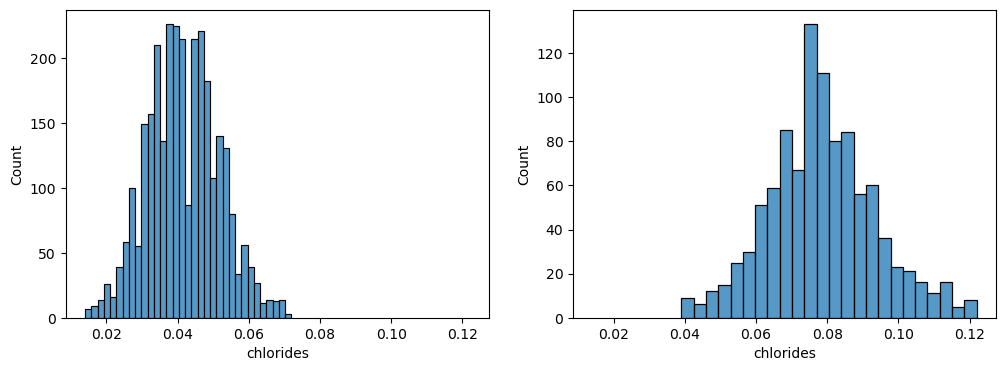

In [381]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)#, sharey=True)

sns.histplot(wine_w, x='chlorides', ax=ax[0])
sns.histplot(wine_r, x='chlorides', ax=ax[1])

## Total Sulfur Dioxide

<Axes: xlabel='total_sulfur_dioxide', ylabel='Count'>

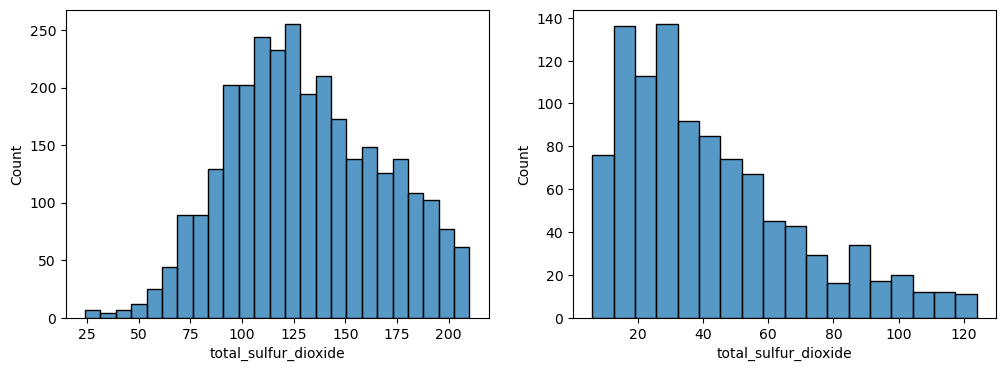

In [382]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='total_sulfur_dioxide', ax=ax[0])
sns.histplot(wine_r, x='total_sulfur_dioxide', ax=ax[1])

## Free Sulfur Dioxide

<Axes: xlabel='free_sulfur_dioxide', ylabel='Count'>

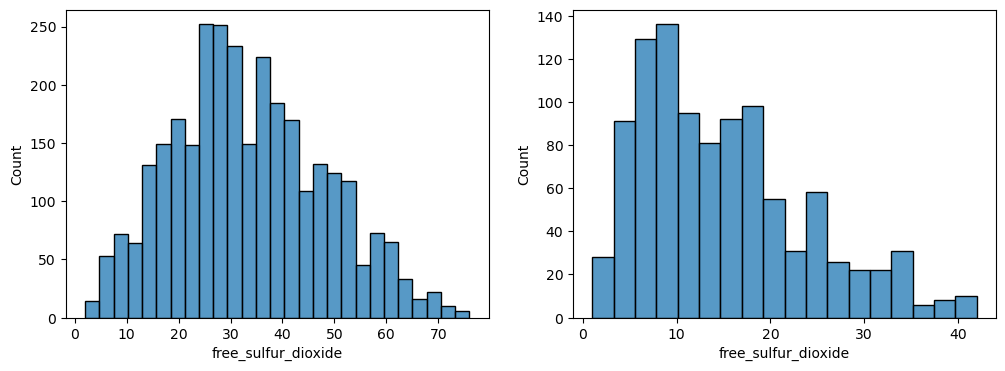

In [383]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='free_sulfur_dioxide', ax=ax[0])
sns.histplot(wine_r, x='free_sulfur_dioxide', ax=ax[1])

## Sulphates

<Axes: xlabel='sulphates', ylabel='Count'>

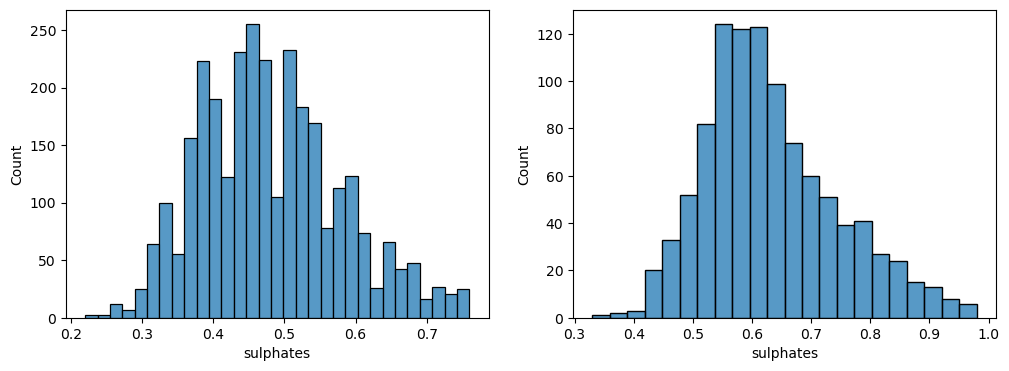

In [384]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='sulphates', ax=ax[0])
sns.histplot(wine_r, x='sulphates', ax=ax[1])

## Density

<Axes: xlabel='density', ylabel='Density'>

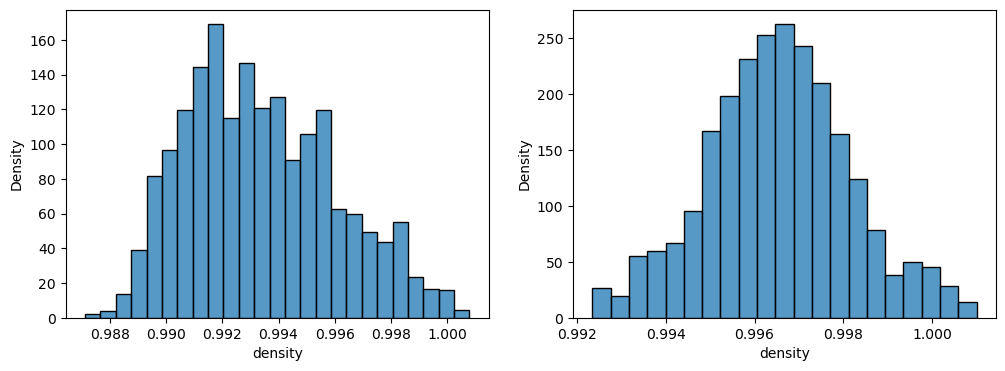

In [385]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

# TODO Why is the plot not normalized?
sns.histplot(x=wine_w.density, stat='density', ax=ax[0])
sns.histplot(x=wine_r.density, stat='density', ax=ax[1])

### Density Outlier

In [386]:
high_density_wines_w = wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head(10)
high_density_wines_w

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label
1680,3.22,7.6,0.32,0.34,0.054,197.0,44.0,0.55,18.35,1.00080,9.0,5,white,low
779,3.28,8.1,0.17,0.44,0.053,145.0,43.0,0.75,14.10,1.00060,8.8,8,white,high
1078,3.49,6.5,0.26,0.34,0.051,197.0,56.0,0.42,16.30,1.00040,9.8,5,white,low
1664,3.27,8.1,0.28,0.46,0.059,177.0,32.0,0.58,15.40,1.00040,9.0,4,white,low
4014,2.98,6.5,0.18,0.48,0.054,183.0,56.0,0.61,18.00,1.00038,8.5,6,white,medium
4018,2.98,6.4,0.18,0.48,0.054,183.0,56.0,0.61,18.00,1.00038,8.5,6,white,medium
1267,3.21,8.0,0.22,0.42,0.044,163.0,45.0,0.69,14.60,1.00030,8.6,7,white,high
1793,3.27,7.4,0.35,0.31,0.062,187.0,42.0,0.64,17.95,1.00020,9.1,5,white,low
1999,3.13,7.3,0.18,0.31,0.055,197.0,32.0,0.46,17.30,1.00020,9.0,6,white,medium
1065,3.22,8.3,0.22,0.38,0.054,126.0,32.0,0.50,14.80,1.00020,9.7,5,white,low


In [387]:
wine_w.columns

Index(['ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
       'residual_sugar', 'density', 'alcohol', 'quality', 'color',
       'quality_label'],
      dtype='object')

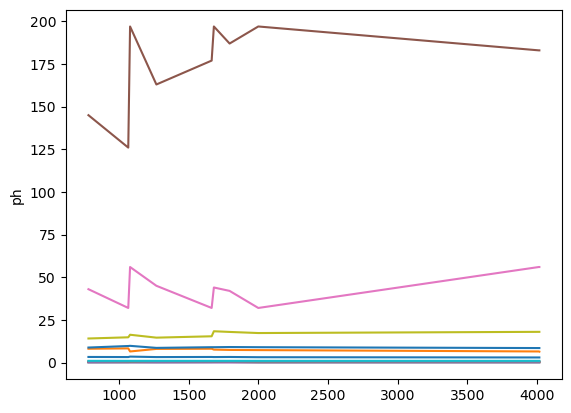

In [388]:
for input in all_inputs:
    sns.lineplot(high_density_wines_w[input])

## Residual Sugar

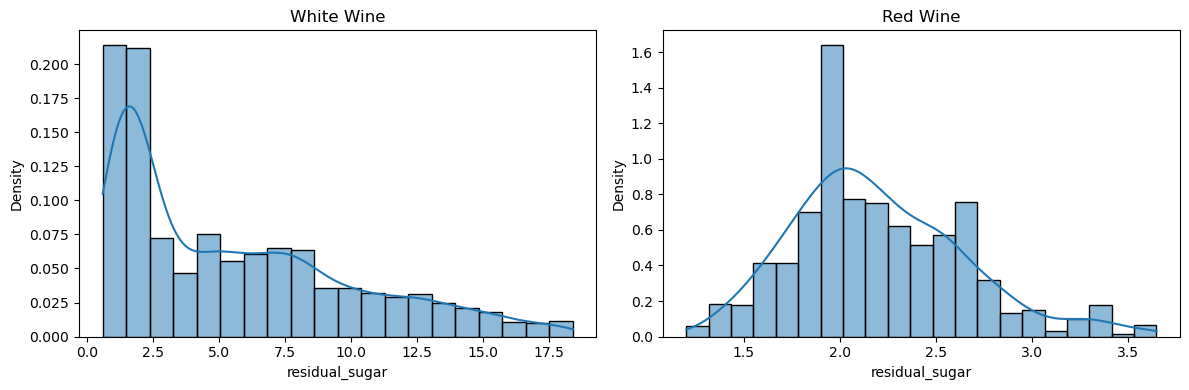

In [389]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='residual_sugar', stat='density', kde=True, ax=ax[0])
sns.histplot(wine_r, x='residual_sugar', stat='density', kde=True, ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

- The distribution of Residual Sugar is wider in white wines; the distribution is quite narrow in red wines.
- Red wines have a maximum around 2

## Alcohol

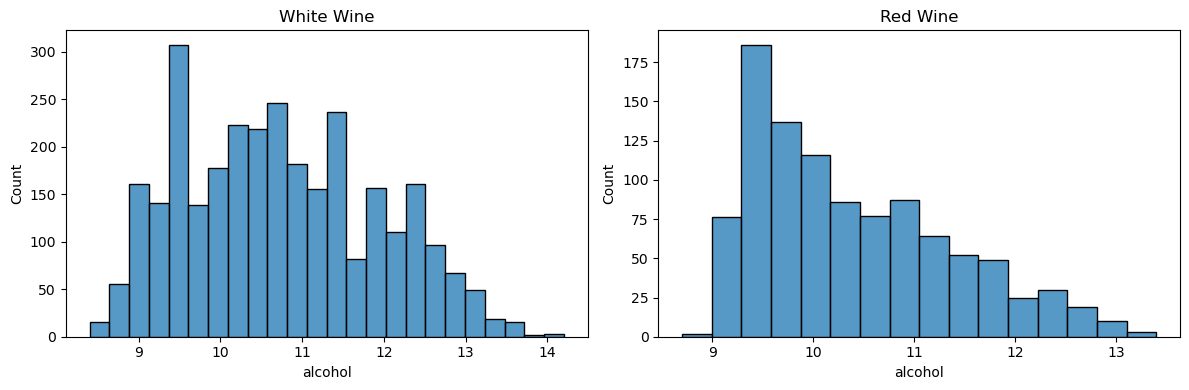

In [390]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='alcohol', ax=ax[0])
sns.histplot(wine_r, x='alcohol', ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

## Density vs. Sulphates

<Axes: xlabel='sulphates', ylabel='density'>

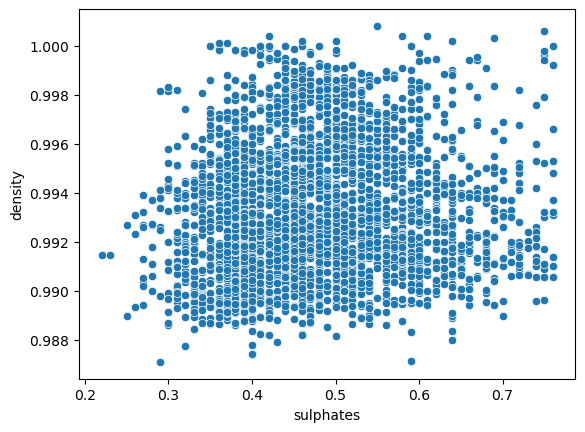

In [391]:
sns.scatterplot(wine_w, y='density', x='sulphates')

## Density vs. Residual Sugar

(0.99, 1.005)

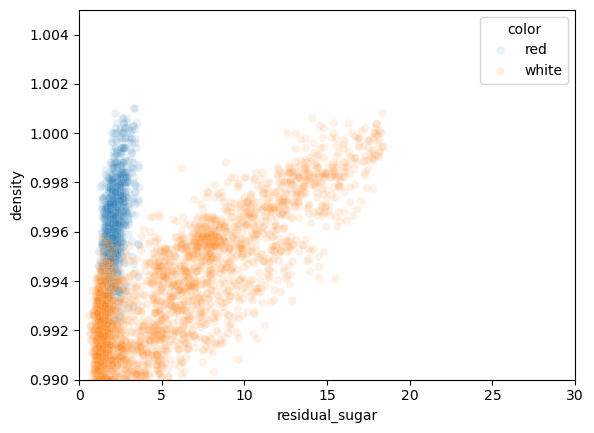

In [392]:
ax = sns.scatterplot(wine, y='density', x='residual_sugar', 
                     hue='color', alpha=0.1
                     )

ax.set_xlim([0, 30])
ax.set_ylim([0.99, 1.005])

(0.98, 1.005)

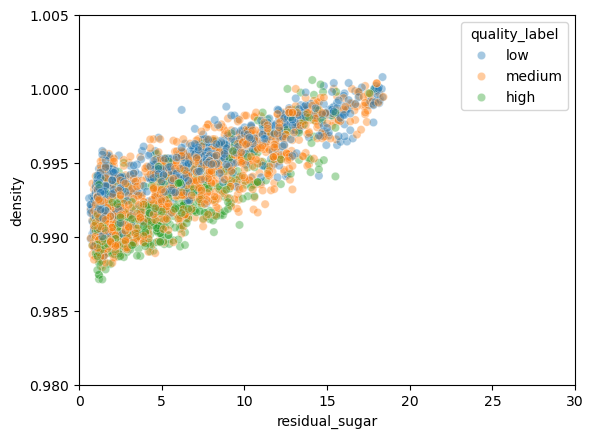

In [393]:
ax = sns.scatterplot(wine_w, y='density', x='residual_sugar', hue='quality_label', alpha=0.4)

ax.set_xlim([0, 30])
ax.set_ylim([0.98, 1.005])

<Axes: xlabel='total_sulfur_dioxide', ylabel='density'>

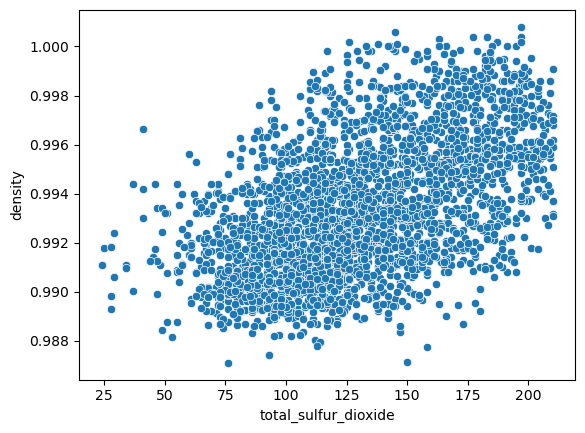

In [394]:
sns.scatterplot(wine_w, y='density', x='total_sulfur_dioxide')

<Axes: xlabel='total_sulfur_dioxide', ylabel='residual_sugar'>

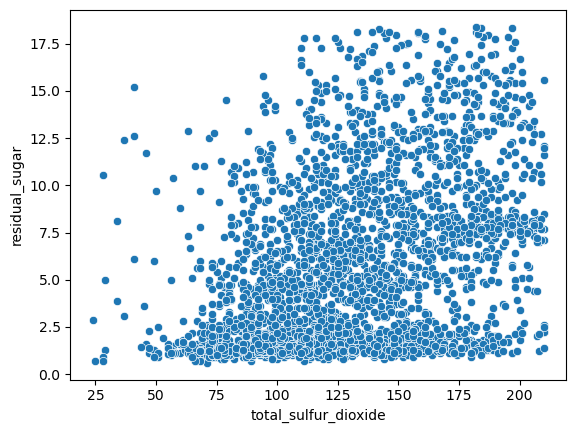

In [395]:
sns.scatterplot(wine_w, y='residual_sugar', x='total_sulfur_dioxide')